# Linear Regression

Linear regression is a supervised linear model that is applied to real-valued target functions, and is one of the most fundamental algorithms in machine learning. Unlike classification models, regression is used to predict a range of possible (reasonible) outputs for a given input. Though it may seem somewhat dull compared to some of the more modern algorithms, linear regression is still a useful and widely used statistical learning method. 


Below we will illustrate an example predicting the median salary of a developer based on age. Since linear regression assumes the data is linear, we first plot the data to verify this assumption.

For this notebook we will need the following packages:
 * Plots [documentation](http://docs.juliaplots.org/latest/)
 * CSV [documentation](https://docs.julialang.org/en/v1/stdlib/Random/)

---

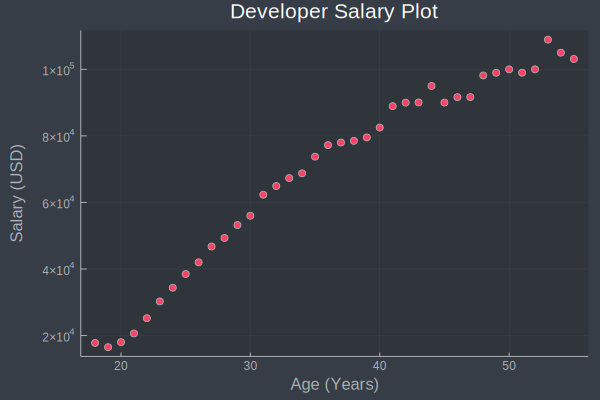

In [1]:
using Plots
using Random
theme(:dark)

# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

# Developer Salary
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

data = zip(ages_x, dev_y)

scatter([p for p in data], 
    xaxis = "Age (Years)", 
    yaxis = "Salary (USD)",
    title = "Developer Salary Plot",
    legend = false)

---

In order to measure the accuracy of the model that we build, we need split the data set into a training set and a testing set. In the following code cell we randomly assign a training set and

---

In [2]:
# Randomly select a collection of training data
train_x = randsubseq(ages_x, .5)
train_y = [x[2] for x in data if x[1] in train_x]
train_data = zip(train_x, train_y)

# Test data 
test_data = [p for p in data if p ∉ train_data];

---

Let $x_1, \dots, x_n$ denote the set of testing $x$ values and let

$$
X = \begin{bmatrix}
   x_1 & 1\\
   x_2 & 1\\
   x_3 & 1\\
   x_4 & 1\\
   \vdots & \vdots \\
   x_n & 1
\end{bmatrix}
$$

For a given data point $(x, y)$, we would like to find a straight line $y = w_1x + w_2$. Because we would like this to be true for all training points, we necessarily seek to solve the following linear equation: 
$$
\begin{bmatrix}
   x_1 & 1\\
   x_2 & 1\\
   x_3 & 1\\
   x_4 & 1\\
   \vdots & \vdots \\
   x_n & 1
\end{bmatrix}
\begin{bmatrix}
   w_1 \\
   w_2
\end{bmatrix}
=
\begin{bmatrix}
   y_1 \\
   y_2 \\
   y_3 \\
   \vdots
   y_n
\end{bmatrix}
$$

Or simply, 

$$
Xw = y.
$$

Because $X$ is likely not invertible, the best we can do is find an approximate vector $\hat{w}$ so that $X\hat{w} \approx y$. This can be done by solving the equation 

$$
X^{T}X\hat{w} = X^{T}y.
$$

Or more specifically, we compute

$$
\hat{w} = (X^{T}X)^{-1}X^{T}y.
$$

The following code cell creates the matrix $X$ and then solves the above equation. 

---

In [3]:
# Linear Regression
X = ones(length(train_x), 2)
X[:, 1] = train_x
ŵ = (X'*X)\(X'*train_y);

---

Now that we have solved for $\hat{w}$, we can write a linear equation in terms of the values in $\hat{w}$. This linear equation is a predictor function for a given input value $x$. The next code block shows this code.

---

In [4]:
# Define the regression line
regression_line(x) = ŵ[1]*x + ŵ[2];

---

For our data above we can now plot the regression line and visualize how this line fits the training data. 

---

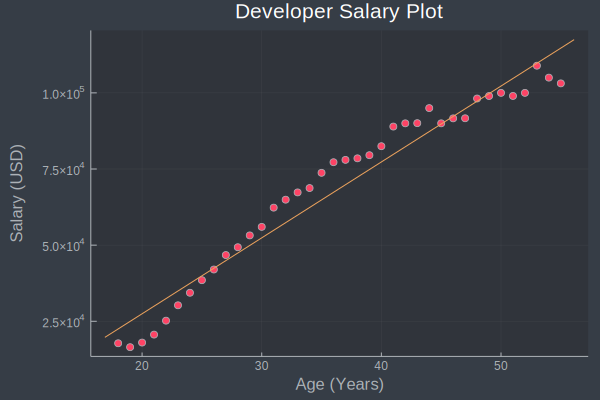

In [5]:
plot!(regression_line, 
      label = "Regression Line")

---

Because we are interested in measuring our out of sample error, i.e., how well our predictor performs on the test data, we next plot the regression line against the testing data. 

---

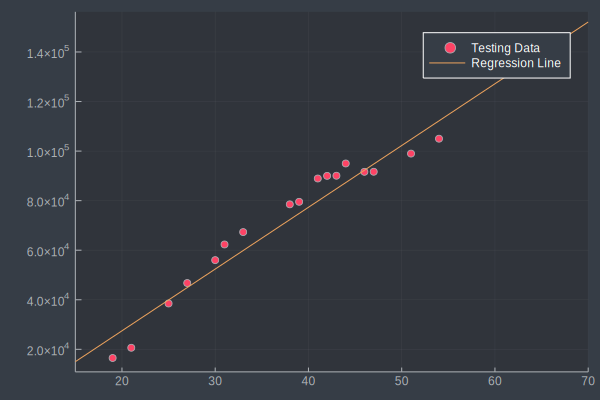

In [7]:
scatter([p for p in test_data], 
        label = "Testing Data", 
        xlims = (15, 70))
plot!(regression_line, 
      label = "Regression Line")